In [14]:
import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
y_test, y_train = y_test.ravel(), y_train.ravel()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000,), (10000,))

In [15]:
labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

labels_dict = {i: label for i, label in enumerate(labels)}

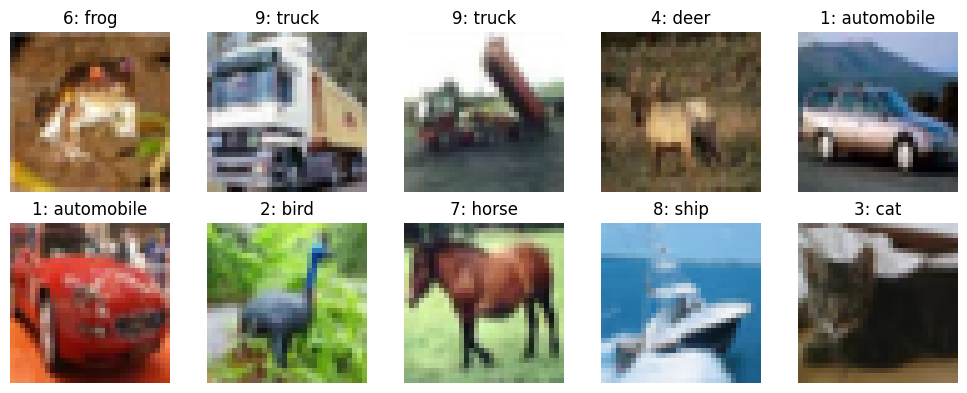

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")
fig.tight_layout()


In [17]:
scaled_X_train = X_train.astype("float32")/255
scaled_X_test = X_test.astype("float32")/255


In [18]:
from keras import layers

def CNN_model(learning_rate = 0.001, drop_rate=0.5, kernels=[32,64]):
    adam = keras.optimizers.Adam(learning_rate=learning_rate)

    model = keras.Sequential(name="CNN")

    for kern in kernels: 
        conv_layer = layers.Conv2D(kern, kernel_size=3, activation="relu", kernel_initializer="he_normal",
                                   input_shape=X_train.shape[1:])
        model.add(conv_layer)
        model.add(layers.MaxPooling2D(pool_size=2, strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(drop_rate))
    model.add(layers.Dense(256, activation="relu", kernel_initializer="he_normal"))
    model.add(layers.Dense(10, activation="softmax" ))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
    return model



In [19]:
model = CNN_model(.001, .5, [32, 64, 32])
model.summary()

c:\Users\Rober\Documents\GitHub\Deeplearning-JoakimRoberg\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model.fit(scaled_X_train, y_train, epochs=100, callbacks=[early_stopper], validation_split=0.2)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2503 - loss: 1.9790 - val_accuracy: 0.4589 - val_loss: 1.4814
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4274 - loss: 1.5444 - val_accuracy: 0.5115 - val_loss: 1.3683
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4926 - loss: 1.3873 - val_accuracy: 0.5542 - val_loss: 1.2741
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.5222 - loss: 1.3184 - val_accuracy: 0.5705 - val_loss: 1.1920
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.5434 - loss: 1.2541 - val_accuracy: 0.5855 - val_loss: 1.1615
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.5701 - loss: 1.1916 - val_accuracy: 0.6136 - val_loss: 1.0929
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.5845 - loss: 1.1482 - val_accuracy: 0.6064 - val_loss: 1.0835
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.60

In [26]:
import pandas as pd

metrics = pd.DataFrame(model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.321625,1.799246,0.4589,1.481358
1,0.441250,1.515994,0.5115,1.368274
2,0.500150,1.375605,0.5542,1.274123
3,0.527850,1.300176,0.5705,1.191987
4,0.550800,1.242147,0.5855,1.161487


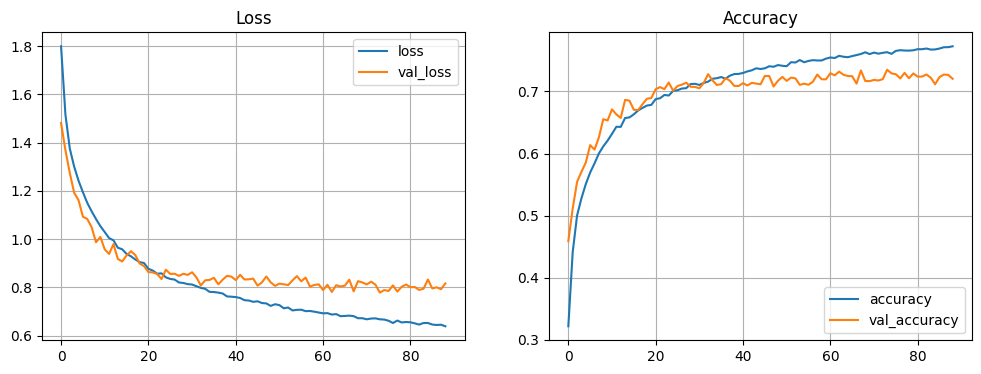

In [27]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True)
    metrics[["accuracy", "val_accuracy"]].plot(ax = ax[1], title = "Accuracy", grid = True)

plot_metrics(metrics)

In [35]:
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)

def evaluate_model(**kwargs):
    model = CNN_model(**kwargs)
    model.fit(scaled_X_train,
              y_train,
              validation_split=1/6,
              epochs=20,
              callbacks=[early_stopper])
    metrics = pd.DataFrame(model.history.history)

    val_acc = metrics["val_acc"].iloc[-1]
    return val_acc

In [37]:
import numpy as np
dropout_accuracies = {}
for drop_rate in np.arange(.1, .6, .1):
    drop_rate = np.round(drop_rate,1) 
    dropout_accuracies[drop_rate] = evaluate_model(drop_rate = drop_rate)

Epoch 1/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4146 - loss: 1.6424 - val_accuracy: 0.5803 - val_loss: 1.1770
Epoch 2/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6212 - loss: 1.0739 - val_accuracy: 0.6399 - val_loss: 1.0221
Epoch 3/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6833 - loss: 0.9050 - val_accuracy: 0.6785 - val_loss: 0.9241
Epoch 4/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7309 - loss: 0.7660 - val_accuracy: 0.6994 - val_loss: 0.8813
Epoch 5/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7759 - loss: 0.6404 - val_accuracy: 0.7115 - val_loss: 0.8791


KeyError: 'val_acc'

In [ ]:
pd.DataFrame(dropout_accuracies.values(), index=dropout_accuracies.keys()).plot(
    title="Tuning dropouts", xlabel="Dropouts", ylabel="Validation accuracy", style = "--o"
)